# Content

>[Content](#scrollTo=66dOmkdh_3Bx)

>[Artificial Neural Networks](#scrollTo=YiVkndZ5Up77)

>>[Feedforward Neural Networks](#scrollTo=2gY3gD-9ZwPi)

>>[Activation Functions](#scrollTo=cMpmO42gcjJe)

>>>[Identity](#scrollTo=zwnoUVqU-2jN)

>>>[Sigmoid](#scrollTo=Z-Oyiikzx7EF)

>>>>[Standardization](#scrollTo=7xO7_bnsxEI5)

>>>[Tanh](#scrollTo=SbGf15PRx9Pa)

>>>>[The Vanishing Gradient Problem](#scrollTo=BJNIGlf-yj6d)

>>>[ReLU](#scrollTo=oKkr1zJFz0jZ)

>>>>[Dead Neuron Problem](#scrollTo=98grfxfc2T-A)

>>>[LReLU](#scrollTo=SwJuY83B2yom)

>>>[ELU](#scrollTo=rFwSAjlK4T87)

>>>[Softplus](#scrollTo=IYJ9QMSE5HWO)

>>>[BRU](#scrollTo=N1r-a2oC7E8H)

>>>>[Multiclass Classification](#scrollTo=4bhxjQMB7-GO)

>>>[Softmax](#scrollTo=vJeAKLLx8_5-)

>>[Python Implementation](#scrollTo=8d0HpJ07AVft)

>>>[MNIST Classification](#scrollTo=WsFI355QTd2-)

>>>[Regression](#scrollTo=y9MS_KXiTjha)

>[Convolutional Neural Networks](#scrollTo=bAs-JUyexj_s)

>>[Convolution](#scrollTo=5oneCu4UhTDK)

>>>[Padding](#scrollTo=X2QLvObVlfcN)

>>>[Vectorization](#scrollTo=k3vdTihhmiXC)

>>>[3D Convolution](#scrollTo=AyXuzqK_pWYQ)

>>[Convolution Layer](#scrollTo=i0xzw086wh-W)

>>>[Pooling Layer](#scrollTo=4heUf6MmzIc4)

>>>[Global Max Pooling Layer](#scrollTo=cLQvWVYp25yL)

>>[Python Implementation](#scrollTo=7Gz_dVFG5t6b)

>>>[Data Augmentation](#scrollTo=UtHLaRbfB_ne)

>>>[Normalization / Standardization](#scrollTo=lJu_cam3DYQ6)



# Artificial Neural Networks

## Feedforward Neural Networks

Multiple layers of interconntected neurons (logistic regressions). Left side is input, right side is output. and signal goes from left to right. Hence is called a "feedforward" neural network.

\

Different neurons look for different features.

\

The same inputs can be fed to multiple different neurons, each calculating something different (more neurons per layer).

Neurons in one layer can act as inputs to another layer.

A line: $ax+b$

A neuron: $\sigma(w^Tx+b)$

If there's $M$ neurons, and we call each $z_j$:

$
z_j = \sigma(w^T_jx+b_j), \text{ for } j = 1\dots M \\
$

Vectorize the neurons (Single Layer):

$$
z = \sigma(W^Tx+b)
$$

- $z$ is a vector of size M
- $x$ is a vector of size D
- $W$ is a matrix of size D×M
- $b$ is a vector of size M

\

Vectorize the neurons (Multiple Layer):

We show layer as a superscript

$
z^{(1)} = \sigma(W^{(1)T}x+b^{(1)}) \\
z^{(2)} = \sigma(W^{(2)T}z^{(1)}+b^{(2)}) \\
z^{(3)} = \sigma(W^{(3)T}z^{(2)}+b^{(3)}) \\
$

$$
p(y=1 | x) = \sigma(W^{(L)T}z^{(L-1)}+b^{(L)}) \\
$$

- $L$ number of layers





If we don't need the final sigmoid (eg for prediction of non-binary values), we can just remove it

$$
\hat y = W^{(L)T}z^{(L-1)}+b^{(L)} \\
$$

(This just looks like a linear regression)

## Activation Functions


### Identity

Identity function is just a function that returns it's input.

$$
f(x) = x
$$

This is used for regression models

### Sigmoid

$$
\sigma(a) = \frac{1}{1+\exp(-a)}
$$

- Maps input to 0…1
- Non-linear

![sigmoid](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



#### Standardization

We don't want to have one input in the range 1..5 million, and another in the range 0...0.0001, We prefer inputs centered around 0 and approx. the same range.

The sigmoid output goes between 0 and 1, center is 0.5. Its output therefore can never be centered around 0.

The concept of "uniformity", the output of the sigmoid (previous layer) is the input to the next layer.



### Tanh

The solution to this issue, is another activation function similar to sigmoid, but centered around zero, which is **Hyperbolic Tangent (tanh)**.

$$
\tanh(a) = \frac{\exp(2a)-1}{\exp(2a)+1} \\
$$

![tanh](https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1524687495762-MQLVJGP4I57NT34XXTF4/TanhFunction.jpg?format=1500w)

#### The Vanishing Gradient Problem

Gradient of multiple layers

$$
\frac{\partial J}{\partial W^{(1)}} =
\frac{\partial J}{\partial z^{(L)}}
\frac{\partial z^{(L)}}{\partial z^{(L-1)}} \cdots
\frac{\partial z^{(2)}}{\partial z^{(1)}}
\frac{\partial z^{(1)}}{\partial W^{(1)}}
$$

Output

$$
\sigma(\dots \sigma( \dots (\sigma \dots(\dots))))
$$

We end up multiplying by the derivative of the sigmoid over and over again.


Derivative of sigmoid is very tiny number! Maximum value is only 0.25


![Derivative of sigmoid](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*6A3A_rt4YmumHusvTvVTxw.png)


Multiplying many small numbers, only result in an even smaller number. E.g. $0.25^5 \approx 0.001$

This results in *the further back we go in a neural network, the smaller the gradient becomes*. This is known as **Vanishing Gradient Problem**.


the training algorithm is to take small steps in the direction of the gradient. If the gradient is nearly zero that means the update to the weights is also nearly zero. The end result is that weights close to the input of the neural network are almost not trained at all.

### ReLU

Solution was simple. Don't use activation functions that have vanishing gradients.

For example, **Rectifier Linear Unit (ReLU)**.

$$
R(z) = \max(0, z) \\
$$

![relu](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*DfMRHwxY1gyyDmrIAd-gjQ.png)



#### Dead Neuron Problem

*Problem*, The ReLU doesn't have a "vanishing" gradient, but the gradient in the left half is already vanished!

This phenomenon is knonw as the "**dead neuron**" Probelm.

That fact that the right side does not vanish, seems to be enough for the majority of deep learning experiments.


### LReLU

Leaky ReLU is one solution to the Dead Neuron problem. It has a small Positive slope for negative inputs

$$
f(x) = \left\{\begin{matrix}
x & x \ge 0
\\
\alpha x & x < 0
\end{matrix}\right.
$$
- α is a small number like 0.1

- Slope is always positive
- It's a non-linear function

![lrelu](https://www.researchgate.net/publication/340644173/figure/fig4/AS:880423093686272@1586920631085/5a-Graph-of-the-LReLU-function-5b-Graph-of-gradient-of-LReLU-function.ppm)


### ELU

Exponential linera unit (ELU) is another solution to dead neuron problem which has a more steadily decreasing value on the left side.

Authors claim it speeds up learning and leads to higher accuracy.

Negative values possible, the mean can be zero (unlike ReLU)


$$
f(x) = \left\{\begin{matrix}
x & x > 0
\\
a (e^x -1) & x \le 0
\end{matrix}\right. \\
$$

![elu](https://ml-cheatsheet.readthedocs.io/en/latest/_images/elu.png)

### Softplus

Softplus is another option which is very similar because you're taking the log of the exponent looks very linear when the input is reasonably large.

$$
f(x) = \log(1 + e^x) \\
$$

![softplus](https://www.researchgate.net/profile/Hussam-Lawen/publication/336602359/figure/fig2/AS:814832592908288@1571282637278/The-Softplus-function-ln1-exp-compared-to-max0.ppm)

- Note: both softplus and ELU have vanishing gradients on the left - but we already know it's not too problematic because ReLU works.

- Softplus and ReLU are in the range $0\dots\infty$
  - they can't be centered around 0
  - Does it matter?


### BRU

Bionodal Root Unit (BRU) are activation functions that are more modeled like real neurons.

More at: https://arxiv.org/pdf/1804.11237.pdf



#### Multiclass Classification

If we have K possible outcomes, then we should have K output nodes. i.e. $a^{(L)}$ is a vector of size k.

$$
a^{(L)} = W^{(L)T}z^{(L-1)}+b^{(L)} \\
$$

So we need a probability distribution over K distinct values.
- They must be non negative (>= 0) with an upper limit of 1 (<= 1)
- All probabilites must some to 1

Requirement 1:
$$
p(y=k|x) \ge 0
$$

Requirement21:
$$
\sum_{k=1}^K p(y=k|x) = 1
$$







### Softmax

Softmax is a function that does exactly this.

$$
p(y= k|x) =
\frac{\exp(a_k)}{\sum_{j=1}^K\exp(a_j)}
$$

## Python Implementation

### MNIST Classification

In [ ]:
import tensorflow as tf

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train.shape:  (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.2915 - accuracy: 0.9162 - val_loss: 0.1298 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1392 - accuracy: 0.9589 - val_loss: 0.0968 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1050 - accuracy: 0.9679 - val_loss: 0.0930 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9729 - val_loss: 0.0838 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0738 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9795 - val_loss: 0.0730 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9811 - val_loss: 0.0704 - val_accuracy

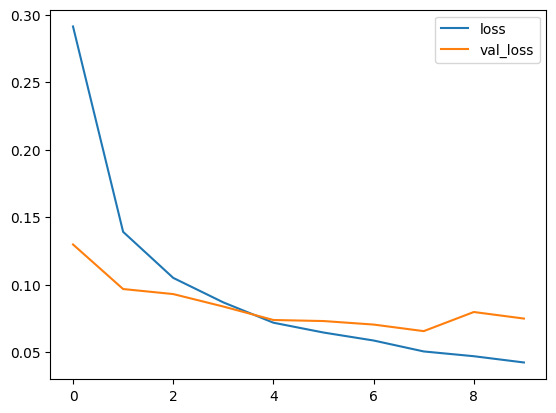

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

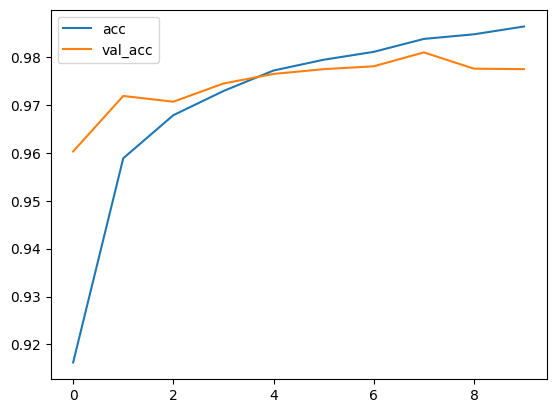

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9775
[0.07486028969287872, 0.9775000214576721]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 966    0    1    2    1    3    2    1    3    1]
 [   0 1126    2    2    0    0    1    1    3    0]
 [   0    3 1009    2    1    0    1    8    7    1]
 [   0    0    2  996    0    3    0    5    2    2]
 [   1    0    5    0  966    0    1    0    1    8]
 [   2    0    0   15    2  865    2    1    4    1]
 [   4    3    2    1    2    6  937    0    3    0]
 [   2    6    7    2    0    0    0 1007    1    3]
 [   5    0    4    9    5    5    3    9  931    3]
 [   1    4    0    9    9    3    1    8    2  972]]


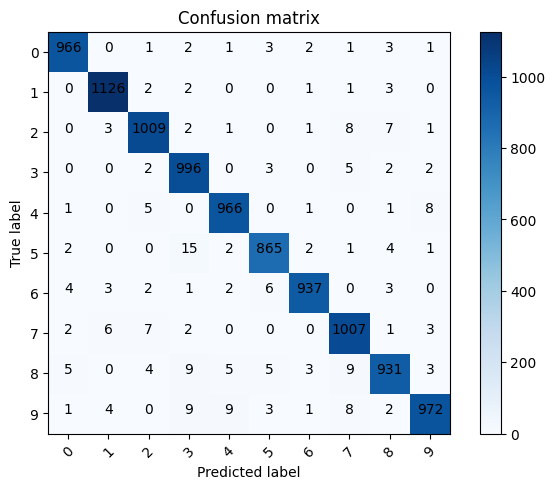

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function print and plot the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

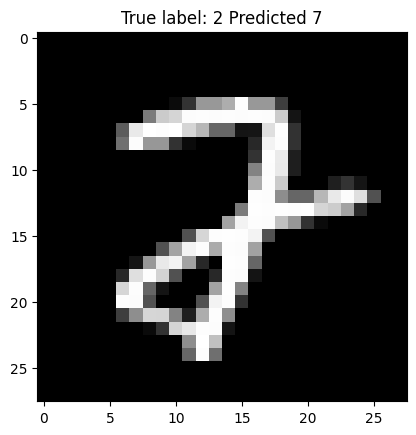

In [ ]:
# Show some misclassified
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]));

### Regression

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # Uniformally distributed between (-3, +3)
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

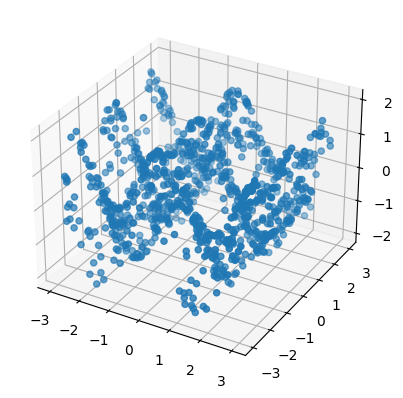

In [ ]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 1.0572
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9645
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9347
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8959
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8271
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7409
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6908
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6332
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6429
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5886
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5508
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5634
Epoch 13/100
32/32 [=================

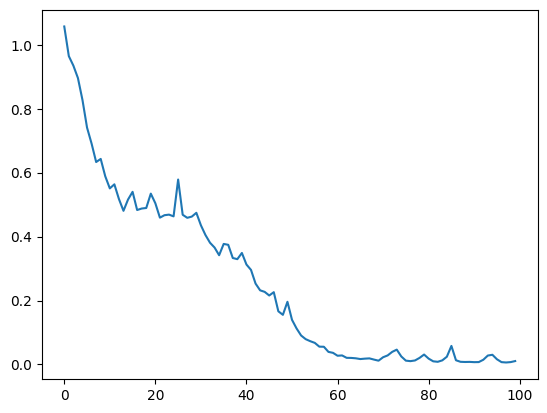

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 3ms/step


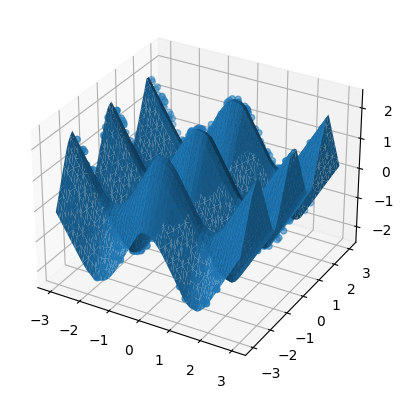

In [ ]:
# Plot the Prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 3ms/step


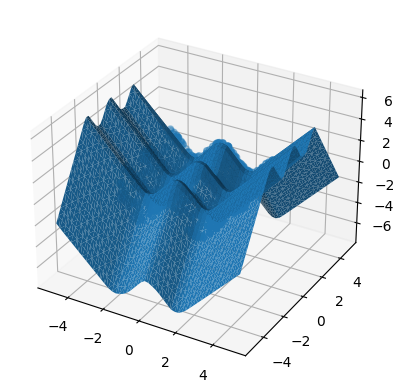

In [ ]:
# Plot the Prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

# Convolutional Neural Networks

## Convolution

2 requirments
- Can you add
- Can you multiply

Filter = Kernal

Convolution: input image + filter = output image

We slide the kernal over the matrix (image) and do mulitplication

$$
(A \times w)_{ij} = \sum_{i'=0}^{K-1} \sum_{j'=0}^{K-1} A(i+i', j+j')w(i',j') \\
$$

- K is kernal size



Example:

$
\begin{bmatrix}
0 & 10 & 10 & 0\\
20 & 30 & 30 & 20\\
10 & 20 & 20 & 10\\
0 & 5 & 5 & 0
\end{bmatrix}
\times
\begin{bmatrix}
1 & 0\\
0 & 2
\end{bmatrix}
=
\begin{bmatrix}
60 & 70 & 50\\
60 & 70 & 50\\
20 & 30 & 20
\end{bmatrix} \\
$

What we do in deep learning is actually **Cross-Correlation**

$$
(A \times w)_{ij} = \sum_{i'=0}^{K-1} \sum_{j'=0}^{K-1} A(i+i', j+j')w(i',j') \\
$$

Real convolution is:

$$
(A \times w)_{ij} = \sum_{i'=0}^{K-1} \sum_{j'=0}^{K-1} A(i-i', j-j')w(i',j') \\
$$


### Padding

We can add zero paddings around the image to prevent image from shirking or data loss.


|Mode|Output Size|Usage|
|----|-----|----|
|Valid|N-K+1|Typical|
|Same|N|Typical|
|Full|N+K-1|Atypical|

N = Input length, K = Kernal length

### Vectorization

Vector sum can be written as a dot product

$
\sum_{i=1}^N a_ib_i  = a^Tb\\
$

Dot prodcut can be written as a cosine product
$
a \cdot b = \sum_{i=1}^N a_ib_i = |a| \ |b| \ \cos\theta_{ab}\\
$


**Cosine Similarity**

$\displaystyle{
\cos \theta_{ab} = \frac{a\cdot b }{|a| \ |b|}\\
}$

We can rewrite as:

$$
\cos \theta  = \frac
{\sum_{i=1}^N x_iy_i}
{
  \sqrt{\sum_{i=1}^N x_i^2 }
  \sqrt{\sum_{i=1}^N y_i^2 }
} \\
$$

Which is very similar to **Pearson Correlation**

$$
\varrho_{xy} = \frac
{\sum^N_{i=1} (x_i -\bar x)(y_i - \bar y)}
{
  \sqrt{\sum^N_{i=1} (x_i - \bar x)^2 }
  \sqrt{\sum^N_{i=1} (y_i - \bar y)^2 }
} \\
$$

> Convolution in deep learning is in fact just correlation. It is just a pattern finder

### 3D Convolution

1-D Convolution

$$
b_i = \sum_{i'=1}^K a_{i+i'}w_{i'} \\
$$

3-D Convolution (3 color channel)

$$
(A \times w)_{ij} =\sum_{c=1}^3 \sum_{i'=0}^{K-1} \sum_{j'=0}^{K-1} A(i+i', j+j',c)w(i',j',c) \\
$$

the 3 channels of color get combine into 1 after the convolution, so the output is 2 dimensional.

We can't repeat the same layer since the next layer would also expect a 3 dimensional input.


We can use 2 different filters and then stack their output on each other to be 3 dimensional again.
```
A=H×W×3
B1=H×W
B2=H×W
A2=H×W×2
```


$$
B(i,j,c) =\sum_{i'=0}^{K-1} \sum_{j'=0}^{K-1}\sum_{c'=1}^{C_1} A(i+i', j+j',c')w(c', i',j',c) \\
$$
- A=H×W×C1
- w=C1×H×W×C2
- B=H×W×C2

Summary:

- We realized we previously only defined convolution for 2-D (grayscale) images and corresponding 2-D filters.
- We extended this to color images by saying the filter should just have the same depth, and then we "dot" along all 3 axes.
- This breaks uniformity, because input is 3-D but output is still 2-D.
- So we wouldn't be able to stack multiple convolutions sequentially
- We extended this further by noting that each layer should find multiple features (using multiple filters)
- This results in multiple 2-D outputs (one per filter) which we can stack to get out a 3-D image once again

The third dimension is commonly known as number of **channels** or number of **feature maps** as expect for the first layer, they don't represent color.

## Convolution Layer

- Dense Layer
$$
\sigma(W^tx+b)
$$
- Conv Layer
$$
\sigma(W\times x+b) \\
$$

- In a Conv layer, b does not have the same shape as $W\times x$ unlike a dense layer
- If $W\times x$ has the sahpe H×W×C2, then b is a vector of size C2
  - One Scalar per feature map

### Pooling Layer

> At a high level, pooling is downsampling an image, that is making an smaller image out of a bigger image.

\

**Max Pooling**

Takes a K by K square and returns the maximum number in it


Example:

$
\begin{bmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
16 & 15 & 14 & 13\\
12 & 11 & 10 & 9
\end{bmatrix}
\rightarrow \text{Max Pooling} \rightarrow
\begin{bmatrix}
6 & 8\\
16 & 14
\end{bmatrix}
$

\

**Average Pooling**

Takes a K by K square and returns the Average number of it


Example:

$
\begin{bmatrix}
1 & 2 & 3 & 4\\
5 & 6 & 7 & 8\\
16 & 15 & 14 & 13\\
12 & 11 & 10 & 9
\end{bmatrix}
\rightarrow \text{Average Pooling} \rightarrow
\begin{bmatrix}
3.5 & 5.5\\
13.5 & 11.5
\end{bmatrix} \\
$

**Advantages**

- Less data to process, faster process time
- Translational Invariance: We don't care where in the imaeg the feature occured, we just care that it did

\

*Hyperparameters*

Pooling window (kernal) overlapping can be controlled by **stride** which is parameter that specificies how many pixels it should skip after each filter.

It is possible for the window to be of non-square sizes, but it's uncommon

**Alternative to Pooling: Stride**

Researchers have found that sometimes, we can avoid pooling and just
do strided convolution instead (we saw this in the context of pooling first)

We get the same reduction in output image size


### Global Max Pooling Layer

It is used to handle images with different sizes.

Neural Networks expect same size vectors, so a *Flatten* layer can't be used for images with different sizes.

Global Max Pooling takes the max over each feature map



## Python Implementation

**CIFAR Dataset**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [ ]:
# Number of classes
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3), strides=2, activation="relu")(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)

x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 14s 5ms/step - loss: 1.5773 - accuracy: 0.4260 - val_loss: 1.3400 - val_accuracy: 0.5245
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2694 - accuracy: 0.5444 - val_loss: 1.1928 - val_accuracy: 0.5776
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1297 - accuracy: 0.5976 - val_loss: 1.0196 - val_accuracy: 0.6416
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0486 - accuracy: 0.6271 - val_loss: 0.9668 - val_accuracy: 0.6573
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9756 - accuracy: 0.6505 - val_loss: 0.9570 - val_accuracy: 0.6648
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9243 - accuracy: 0.6712 - val_loss: 0.9118 - val_accuracy: 0.6775
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8852 - accuracy: 0.6830 - val_loss: 0.9070 - val_accuracy

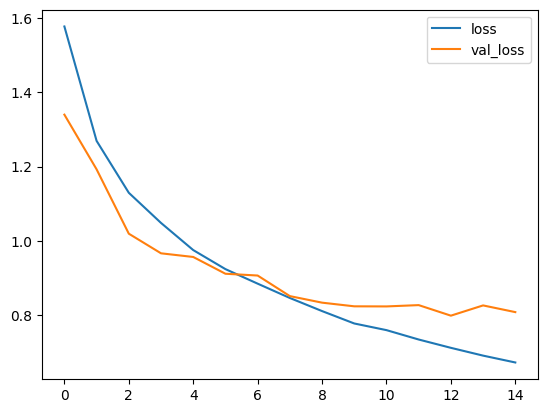

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

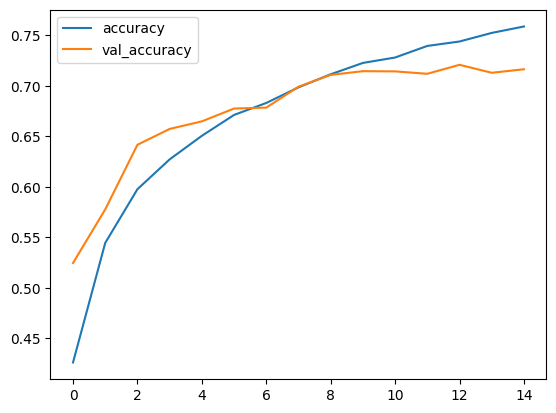

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confustion matrix, without normalization
[[728  18  44   8  25   2  12   9 128  26]
 [ 23 834   4   2   5   2  12   2  28  88]
 [ 62   7 531  35 163  59  90  22  20  11]
 [ 21  13  52 443 110 188 110  24  20  19]
 [ 18   5  31  50 769  18  59  33  14   3]
 [ 12  10  52 157  81 562  55  47  16   8]
 [  5   5  21  32  38  11 875   4   7   2]
 [ 20   1  35  25  81  52  10 758  11   7]
 [ 37  31   6   6  10   3   9   2 877  19]
 [ 37  84   4  12   6   7  12  13  38 787]]


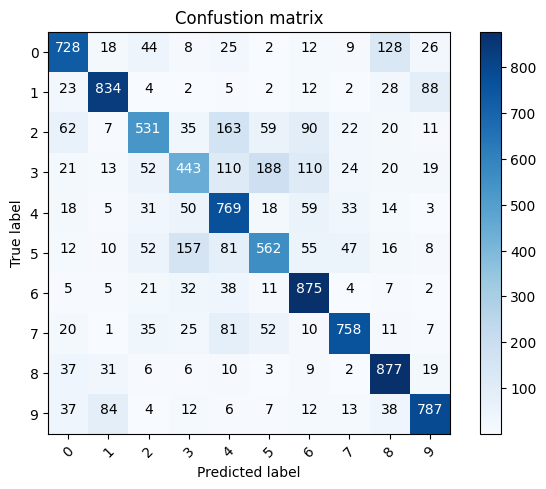

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confustion matrix',cmap=plt.cm.Blues):
  ###
  # This function prints and plots the confustion matrix
  # Normalization can be applied by setting 'normalize=True'
  ###
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confustion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()  / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j,i, format(cm[i,j],fmt),
        horizontalalignment='center',
        color='white' if cm[i,j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

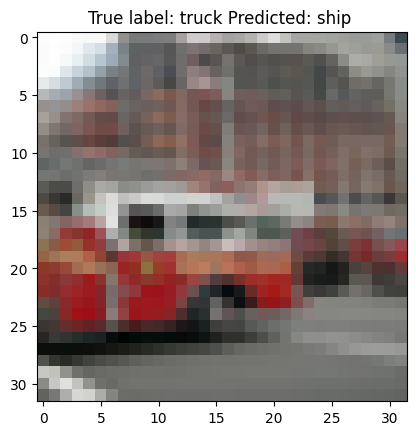

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3),cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));

### Data Augmentation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

### Normalization / Standardization

What if we had a layer that would ook at each batch, calculate the mean and standard deviation on the fly, and standardize base on that?


How do we know normalization is good? We don't.

But we can introduce paramerters that are learnt through gradient descent.

$$
z = (x-\mu_B)/\sigma_B \\
y = z \gamma + \beta
$$

Batch Norm can act as a regularization, and help with overfitting.

Since every batch is slightly different, you'll get a slightly different $\mu_B, \sigma_B$.

They are not the true mean/std of the whole dataset. This is essentially noise, and using noise during training makes the neural network impervious to noise.


Mostly commonly, batch norm layers are used between convolution layers.

In [ ]:
#  Build th model using the functional API

i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1934 - accuracy: 0.9321 - val_loss: 0.7150 - val_accuracy: 0.8099
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1769 - accuracy: 0.9403 - val_loss: 0.6378 - val_accuracy: 0.8290
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1615 - accuracy: 0.9457 - val_loss: 0.7004 - val_accuracy: 0.8260
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1423 - accuracy: 0.9517 - val_loss: 0.6955 - val_accuracy: 0.8330
Epoch 5/15
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1284 - accuracy: 0.9565 - val_loss: 0.7369 - val_accuracy: 0.8199
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.1253 - accuracy: 0.9583 - val_loss: 0.8700 - val_accuracy: 0.8107
Epoch 7/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1136 - accuracy: 0.9616 - val_loss: 0.7639 - val_ac

In [ ]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)

<ipython-input-33-72a2734a3e52>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=15)


Epoch 1/15
1562/1562 [==============================] - 40s 26ms/step - loss: 0.5479 - accuracy: 0.8228 - val_loss: 0.5250 - val_accuracy: 0.8278
Epoch 2/15
1562/1562 [==============================] - 41s 26ms/step - loss: 0.4575 - accuracy: 0.8477 - val_loss: 0.4710 - val_accuracy: 0.8411
Epoch 3/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4243 - accuracy: 0.8583 - val_loss: 0.4478 - val_accuracy: 0.8504
Epoch 4/15
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3994 - accuracy: 0.8645 - val_loss: 0.4567 - val_accuracy: 0.8473
Epoch 5/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.3814 - accuracy: 0.8709 - val_loss: 0.4640 - val_accuracy: 0.8481
Epoch 6/15
1562/1562 [==============================] - 40s 25ms/step - loss: 0.3664 - accuracy: 0.8766 - val_loss: 0.4455 - val_accuracy: 0.8538
Epoch 7/15
1562/1562 [==============================] - 40s 25ms/step - loss: 0.3502 - accuracy: 0.8808 - val_loss: 0.4108 -

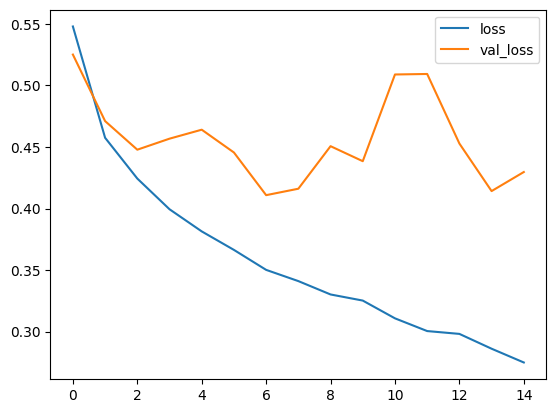

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

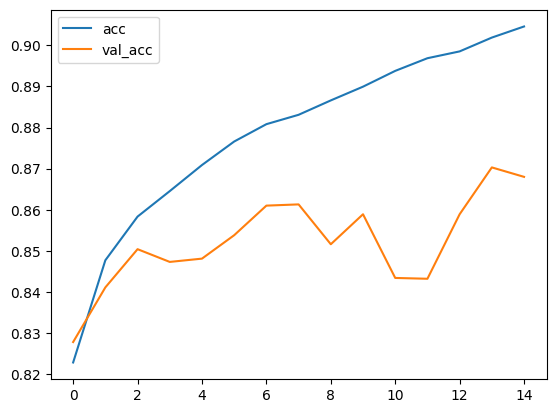

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[881  10  27   3   7   1  11   3  36  21]
 [  3 953   0   1   1   0   2   0   9  31]
 [ 27   0 837  21  24  18  57   7   2   7]
 [ 12   3  48 706  29  68  96  18  10  10]
 [  6   1  45  26 843   7  44  19   5   4]
 [  5   6  38 123  27 729  41  22   2   7]
 [  3   0  13  11   3   3 962   2   2   1]
 [  5   2  23  26  29   8   7 893   1   6]
 [ 27  10   2   0   2   0   5   2 939  13]
 [  9  36   1   2   1   1   4   1   8 937]]


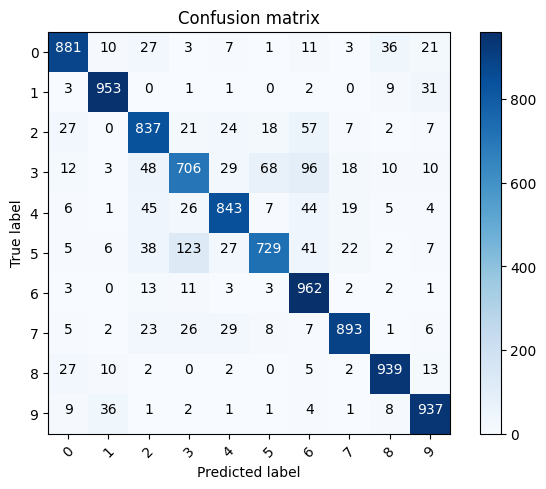

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting normalize=True
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frong
horse
ship
truck'''.split()

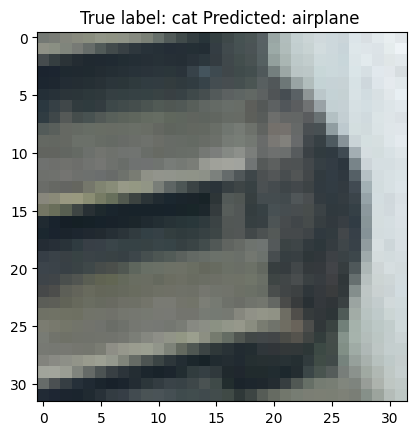

In [ ]:
# Show some misclassified
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s " % (labels[y_test[i]], labels[p_test[i]]));

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0   